In [47]:
# Importing all the modules and packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [48]:
df = pd.read_csv('energydata_complete.csv')
df.head()

,recorded_timestamp,total_energy_use,lighting_energy_use,temp_sensor_1,humidity_sensor_1,temp_sensor_2,humidity_sensor_2,temp_sensor_3,humidity_sensor_3,temp_sensor_4,...,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36,Unnamed: 37,Unnamed: 38,Unnamed: 39,Unnamed: 40,Unnamed: 41
0,11-01-2016 17:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,11-01-2016 17:10,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,11-01-2016 17:20,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,11-01-2016 17:30,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,11-01-2016 17:40,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [49]:
df.shape
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 42 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   recorded_timestamp    19735 non-null  object 
 1   total_energy_use      19735 non-null  int64  
 2   lighting_energy_use   19735 non-null  int64  
 3   temp_sensor_1         19735 non-null  float64
 4   humidity_sensor_1     19735 non-null  float64
 5   temp_sensor_2         19735 non-null  float64
 6   humidity_sensor_2     19735 non-null  float64
 7   temp_sensor_3         19735 non-null  float64
 8   humidity_sensor_3     19735 non-null  float64
 9   temp_sensor_4         19735 non-null  float64
 10  humidity_sensor_4     19735 non-null  float64
 11  temp_sensor_5         19735 non-null  float64
 12  humidity_sensor_5     19735 non-null  float64
 13  temp_sensor_6         19735 non-null  float64
 14  humidity_sensor_6     19735 non-null  float64
 15  temp_sensor_7      

In [50]:
df['recorded_timestamp'] = pd.to_datetime(df['recorded_timestamp'], format='%d-%m-%Y %H:%M')
df['recorded_timestamp'].head()

0   2016-01-11 17:00:00
1   2016-01-11 17:10:00
2   2016-01-11 17:20:00
3   2016-01-11 17:30:00
4   2016-01-11 17:40:00
Name: recorded_timestamp, dtype: datetime64[ns]

In [51]:
#Dropping the columns that are not needed
for i in range(29, 42):
    df.drop(['Unnamed: ' + str(i)], axis=1, inplace=True)
df.drop(['random_variable_1', 'random_variable_2'], axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 27 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   recorded_timestamp    19735 non-null  datetime64[ns]
 1   total_energy_use      19735 non-null  int64         
 2   lighting_energy_use   19735 non-null  int64         
 3   temp_sensor_1         19735 non-null  float64       
 4   humidity_sensor_1     19735 non-null  float64       
 5   temp_sensor_2         19735 non-null  float64       
 6   humidity_sensor_2     19735 non-null  float64       
 7   temp_sensor_3         19735 non-null  float64       
 8   humidity_sensor_3     19735 non-null  float64       
 9   temp_sensor_4         19735 non-null  float64       
 10  humidity_sensor_4     19735 non-null  float64       
 11  temp_sensor_5         19735 non-null  float64       
 12  humidity_sensor_5     19735 non-null  float64       
 13  temp_sensor_6   

Exploratory Data Analysis

In [52]:
df.describe()

,recorded_timestamp,total_energy_use,lighting_energy_use,temp_sensor_1,humidity_sensor_1,temp_sensor_2,humidity_sensor_2,temp_sensor_3,humidity_sensor_3,temp_sensor_4,...,temp_sensor_8,humidity_sensor_8,temp_sensor_9,humidity_sensor_9,external_temp,atmospheric_pressure,external_humidity,wind_speed_mps,visibility_km,dew_point_temp
count,19735,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,...,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000
mean,2016-03-20 05:30:00,97.694958,3.801875,21.686571,40.259739,20.341219,40.420420,22.267611,39.242500,20.855335,...,22.029107,42.936165,19.485828,41.552401,7.412580,755.522602,79.750418,4.039752,38.330834,3.760995
min,2016-01-11 17:00:00,10.000000,0.000000,16.790000,27.023333,16.100000,20.463333,17.200000,28.766667,15.100000,...,16.306667,29.600000,14.890000,29.166667,-5.000000,729.300000,24.000000,0.000000,1.000000,-6.600000
25%,2016-02-14 23:15:00,50.000000,0.000000,20.760000,37.333333,18.790000,37.900000,20.790000,36.900000,19.530000,...,20.790000,39.066667,18.000000,38.500000,3.670000,750.933333,70.333333,2.000000,29.000000,0.900000
50%,2016-03-20 05:30:00,60.000000,0.000000,21.600000,39.656667,20.000000,40.500000,22.100000,38.530000,20.666667,...,22.100000,42.375000,19.390000,40.900000,6.920000,756.100000,83.666667,3.666667,40.000000,3.430000
75%,2016-04-23 11:45:00,100.000000,0.000000,22.600000,43.066667,21.500000,43.260000,23.290000,41.760000,22.100000,...,23.390000,46.536000,20.600000,44.338095,10.400000,760.933333,91.666667,5.500000,40.000000,6.570000
max,2016-05-27 18:00:00,1080.000000,70.000000,26.260000,63.360000,29.856667,56.026667,29.236000,50.163333,26.200000,...,27.230000,58.780000,24.500000,53.326667,26.100000,772.300000,100.000000,14.000000,66.000000,15.500000
std,NaN,102.524891,7.935988,1.606066,3.979299,2.192974,4.069813,2.006111,3.254576,2.042884,...,1.956162,5.224361,2.014712,4.151497,5.318464,7.399441,14.901088,2.451221,11.794719,4.195248


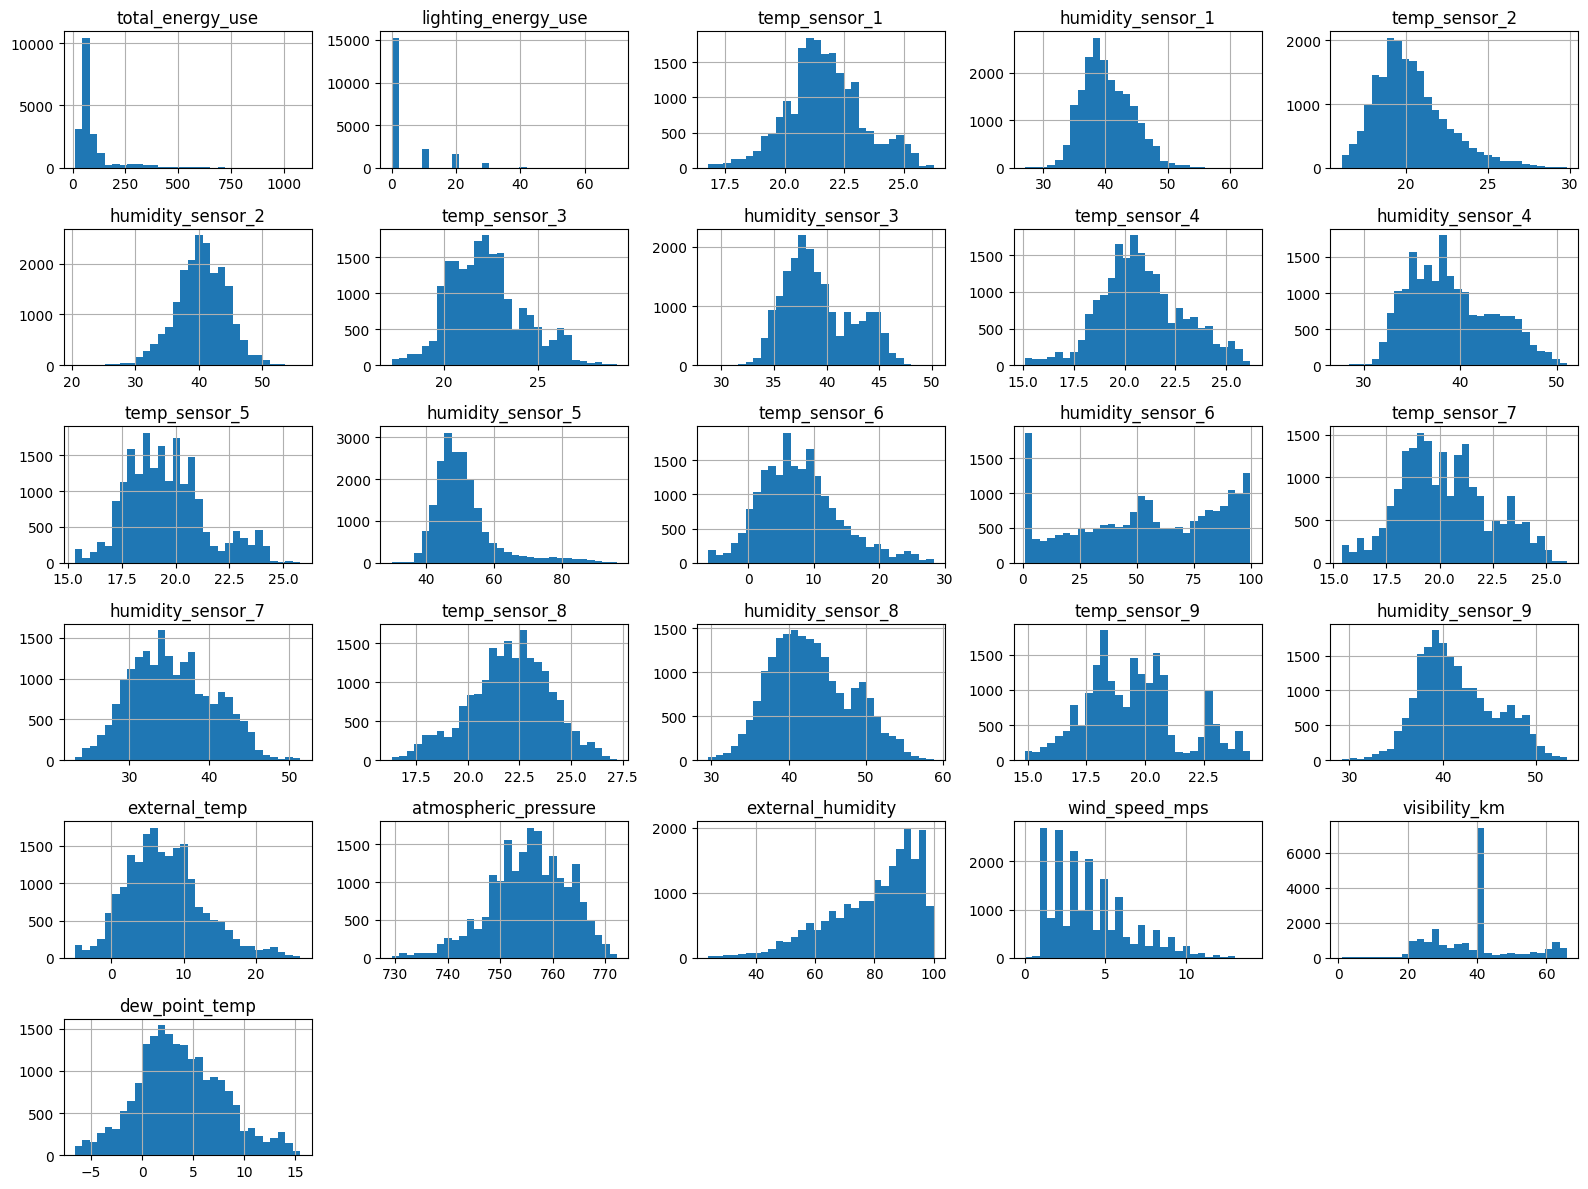

In [60]:
# Histograms for all numeric features
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
df[numeric_cols].hist(figsize=(16, 12), bins=30)
plt.tight_layout()
plt.show()

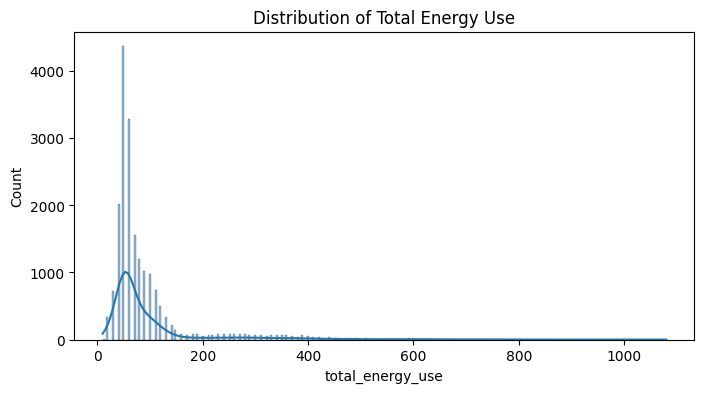

In [53]:
# Displaying the distribution of the target variable
plt.figure(figsize=(8,4))
sns.histplot(df['total_energy_use'], kde=True)
plt.title('Distribution of Total Energy Use')
plt.show()

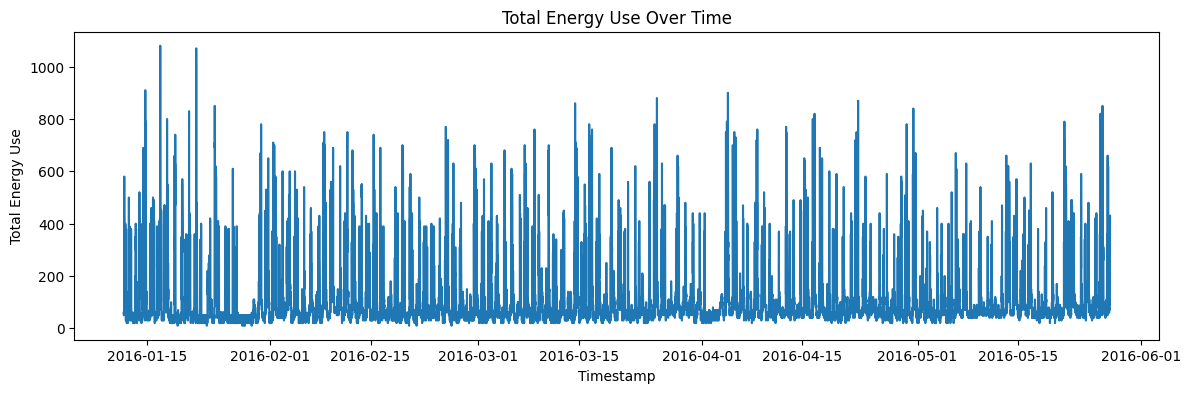

In [58]:
# Plot total energy use over time
plt.figure(figsize=(14,4))
plt.plot(df['recorded_timestamp'], df['total_energy_use'])
plt.title('Total Energy Use Over Time')
plt.xlabel('Timestamp')
plt.ylabel('Total Energy Use')
plt.show()

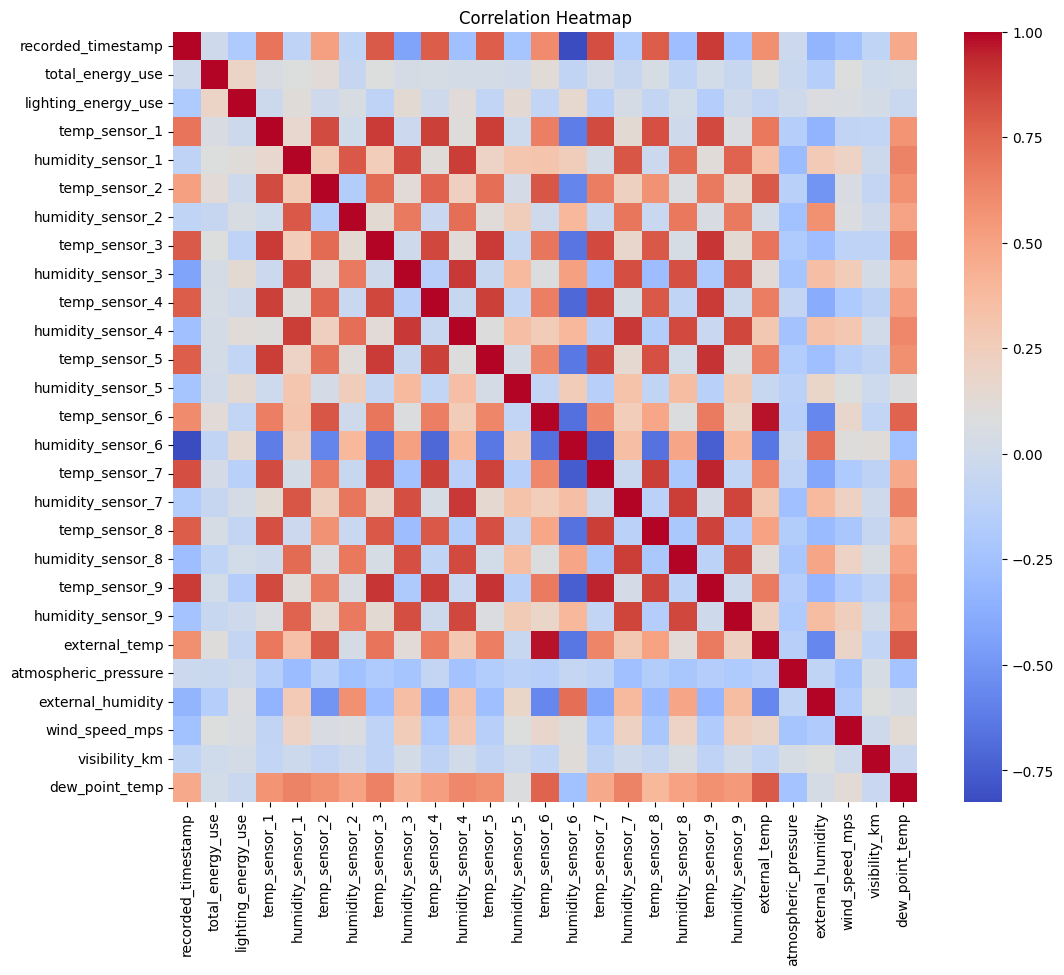

In [54]:
# Correlation heatmap to visualize relationships between features
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(), cmap='coolwarm', annot=False)
plt.title('Correlation Heatmap')
plt.show()

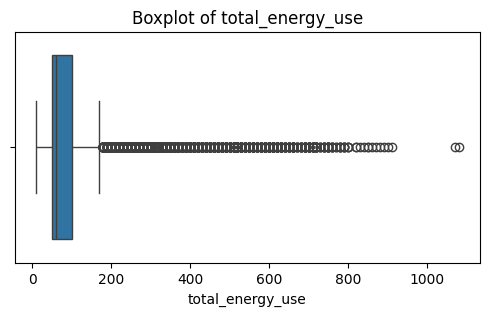

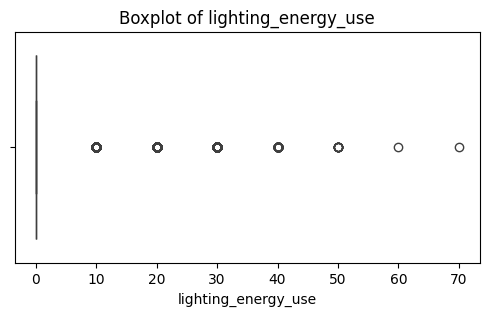

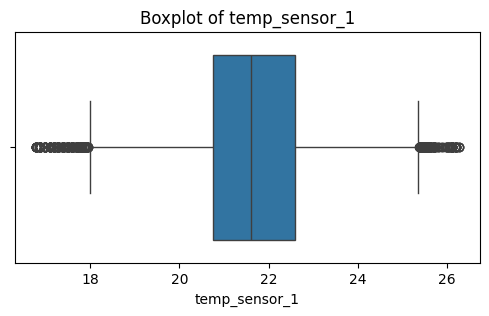

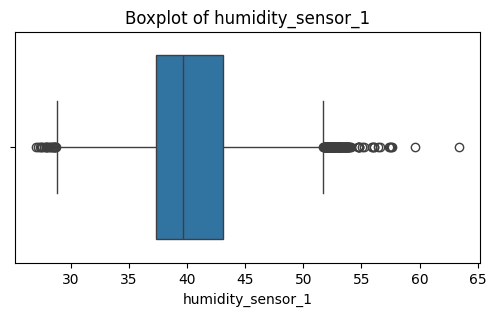

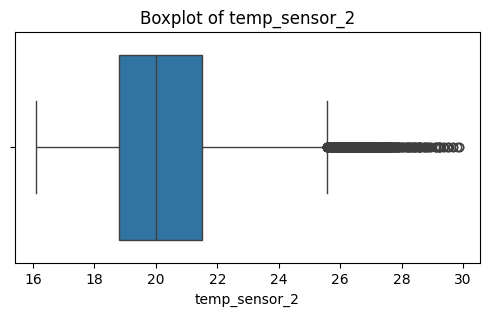

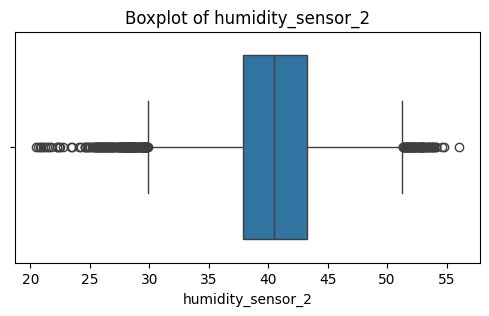

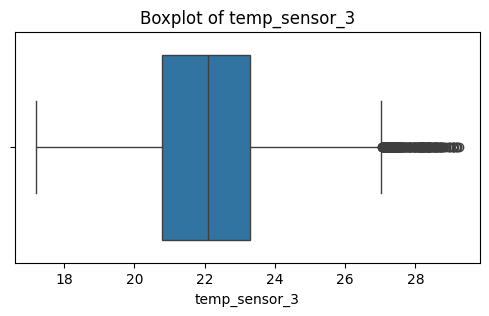

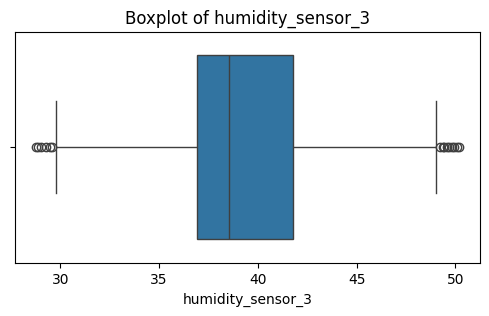

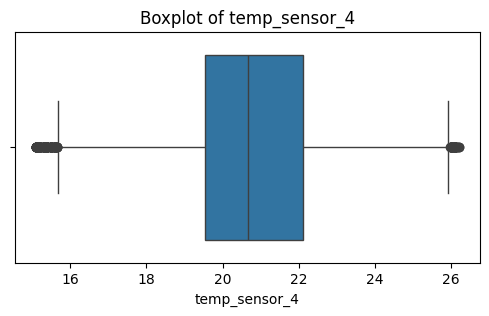

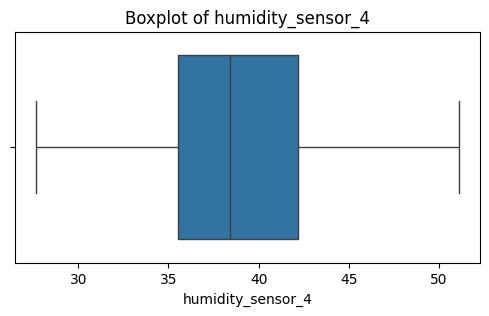

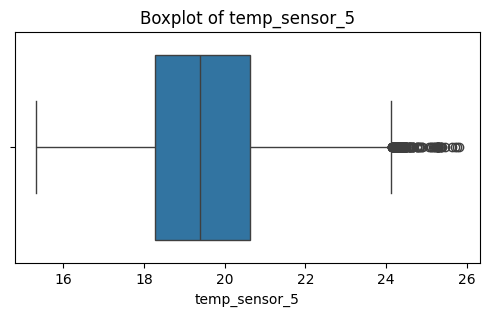

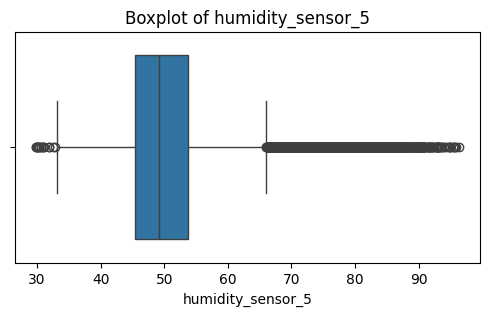

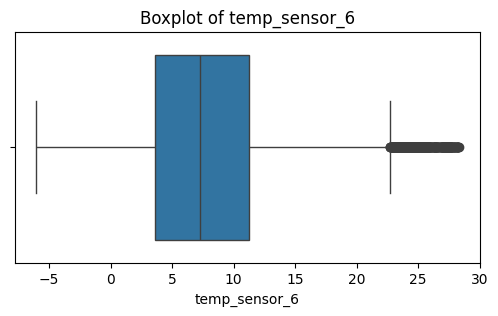

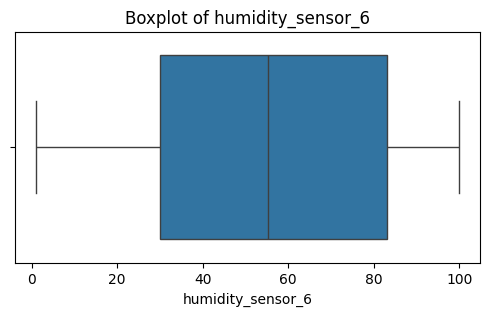

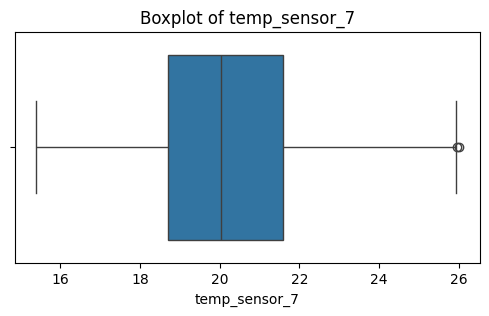

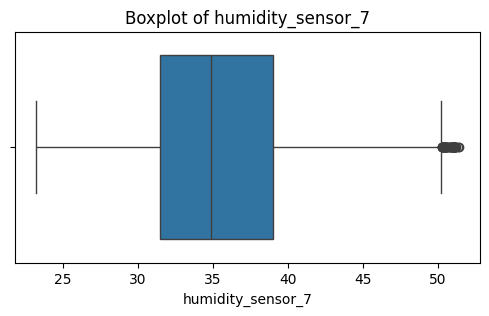

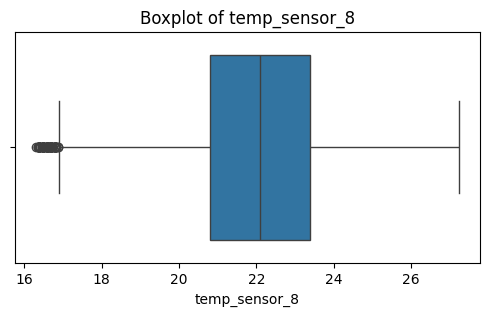

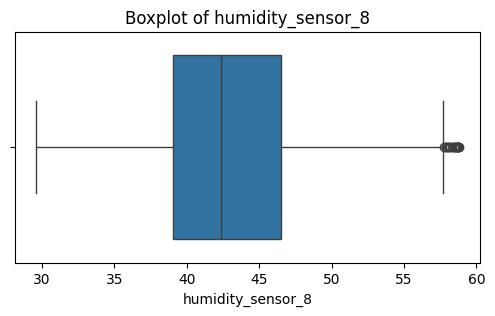

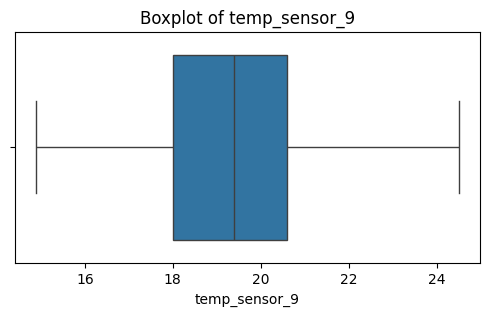

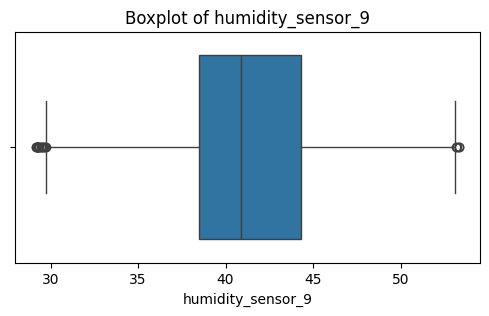

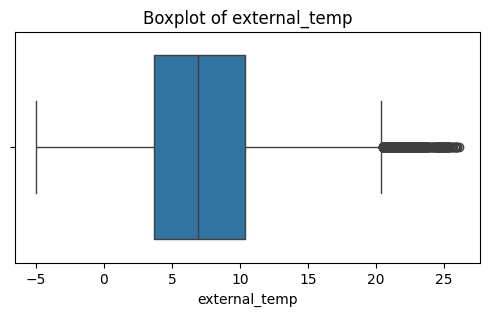

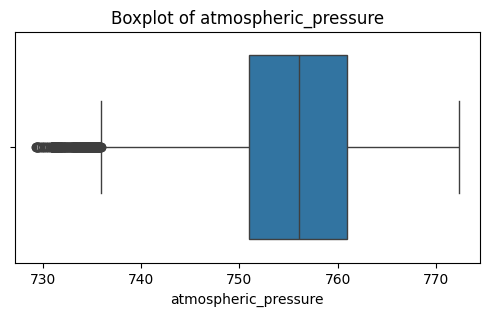

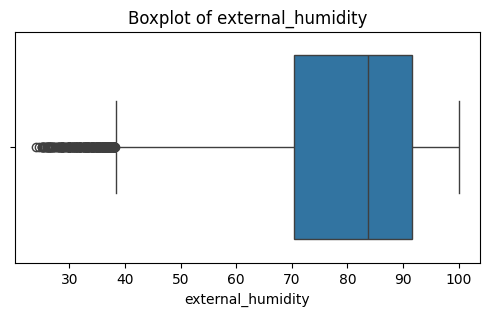

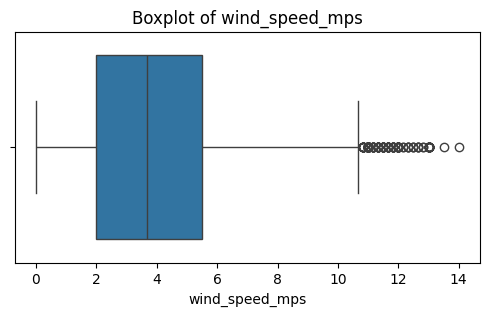

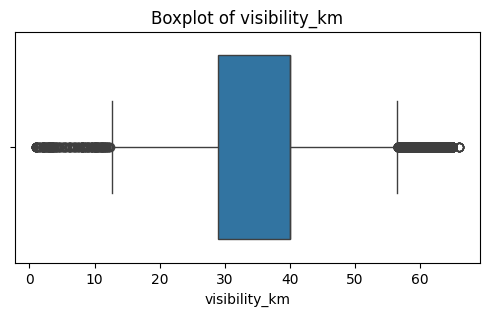

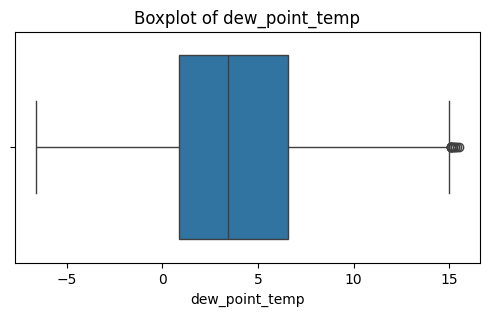

In [ ]:
#Boxplots for outlier detection
for col in numeric_cols:
    plt.figure(figsize=(6, 3))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.xlabel(col)
    plt.show()

In [56]:
# Checking for any missing values
df.isnull().sum()

recorded_timestamp      0
total_energy_use        0
lighting_energy_use     0
temp_sensor_1           0
humidity_sensor_1       0
temp_sensor_2           0
humidity_sensor_2       0
temp_sensor_3           0
humidity_sensor_3       0
temp_sensor_4           0
humidity_sensor_4       0
temp_sensor_5           0
humidity_sensor_5       0
temp_sensor_6           0
humidity_sensor_6       0
temp_sensor_7           0
humidity_sensor_7       0
temp_sensor_8           0
humidity_sensor_8       0
temp_sensor_9           0
humidity_sensor_9       0
external_temp           0
atmospheric_pressure    0
external_humidity       0
wind_speed_mps          0
visibility_km           0
dew_point_temp          0
dtype: int64

In [ ]:
# Checking for outliers using IQR method

for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower) | (df[col] > upper)]
    percent = (len(outliers) / len(df)) * 100
    print(f"{col}: {len(outliers)} outliers ({percent:.2f}%)")


total_energy_use: 2138 outliers (10.83%)
lighting_energy_use: 4483 outliers (22.72%)
temp_sensor_1: 515 outliers (2.61%)
humidity_sensor_1: 146 outliers (0.74%)
temp_sensor_2: 546 outliers (2.77%)
humidity_sensor_2: 235 outliers (1.19%)
temp_sensor_3: 217 outliers (1.10%)
humidity_sensor_3: 15 outliers (0.08%)
temp_sensor_4: 186 outliers (0.94%)
humidity_sensor_4: 0 outliers (0.00%)
temp_sensor_5: 179 outliers (0.91%)
humidity_sensor_5: 1330 outliers (6.74%)
temp_sensor_6: 515 outliers (2.61%)
humidity_sensor_6: 0 outliers (0.00%)
temp_sensor_7: 2 outliers (0.01%)
humidity_sensor_7: 42 outliers (0.21%)
temp_sensor_8: 71 outliers (0.36%)
humidity_sensor_8: 17 outliers (0.09%)
temp_sensor_9: 0 outliers (0.00%)
humidity_sensor_9: 21 outliers (0.11%)
external_temp: 440 outliers (2.23%)
atmospheric_pressure: 219 outliers (1.11%)
external_humidity: 239 outliers (1.21%)
wind_speed_mps: 214 outliers (1.08%)
visibility_km: 2522 outliers (12.78%)
dew_point_temp: 11 outliers (0.06%)


In [8]:
# Handling Outliers by capping

# Define a function to cap outliers using IQR method
def cap_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    df[column] = df[column].clip(lower, upper)
    return df

# Apply capping to the selected columns
for col in numeric_cols:
    df = cap_outliers_iqr(df, col)

In [9]:
# Checking for outliers again after capping

for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower) | (df[col] > upper)]
    percent = (len(outliers) / len(df)) * 100
    print(f"{col}: {len(outliers)} outliers ({percent:.2f}%)")


total_energy_use: 0 outliers (0.00%)
lighting_energy_use: 0 outliers (0.00%)
temp_sensor_1: 0 outliers (0.00%)
humidity_sensor_1: 0 outliers (0.00%)
temp_sensor_2: 0 outliers (0.00%)
humidity_sensor_2: 0 outliers (0.00%)
temp_sensor_3: 0 outliers (0.00%)
humidity_sensor_3: 0 outliers (0.00%)
temp_sensor_4: 0 outliers (0.00%)
humidity_sensor_4: 0 outliers (0.00%)
temp_sensor_5: 0 outliers (0.00%)
humidity_sensor_5: 0 outliers (0.00%)
temp_sensor_6: 0 outliers (0.00%)
humidity_sensor_6: 0 outliers (0.00%)
temp_sensor_7: 0 outliers (0.00%)
humidity_sensor_7: 0 outliers (0.00%)
temp_sensor_8: 0 outliers (0.00%)
humidity_sensor_8: 0 outliers (0.00%)
temp_sensor_9: 0 outliers (0.00%)
humidity_sensor_9: 0 outliers (0.00%)
external_temp: 0 outliers (0.00%)
atmospheric_pressure: 0 outliers (0.00%)
external_humidity: 0 outliers (0.00%)
wind_speed_mps: 0 outliers (0.00%)
visibility_km: 0 outliers (0.00%)
dew_point_temp: 0 outliers (0.00%)


Feature Scaling

In [10]:
# Initialize StandardScaler
scaler = StandardScaler()

# Create a copy of the DataFrame
df_scaled = df.copy()

# Fit and transform the numeric columns
df_scaled[numeric_cols] = scaler.fit_transform(df_scaled[numeric_cols])

# Assign the scaled DataFrame back to df
df = df_scaled

Feature Engineering

In [11]:
df['total_energy_use_lag1'] = df['total_energy_use'].shift(1)
df['total_energy_use_lag2'] = df['total_energy_use'].shift(2)

In [12]:
# Converting 'recorded_timestamp' to datetime and extract features
df['hour'] = df['recorded_timestamp'].dt.hour
df['day_of_week'] = df['recorded_timestamp'].dt.dayofweek
df['month'] = df['recorded_timestamp'].dt.month
df['is_weekend'] = df['day_of_week'].isin([5, 6]).astype(int)
df['part_of_day'] = pd.cut(df['hour'], bins=[-1, 5, 11, 17, 21, 24], labels=['Night', 'Morning', 'Afternoon', 'Evening', 'Night2'])


In [13]:
# Encoding the newly created categorical feature
categorical_cols = ['part_of_day'] 

encoder = OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore')
encoded = encoder.fit_transform(df[categorical_cols])

encoded_df = pd.DataFrame(encoded, columns=encoder.get_feature_names_out(categorical_cols), index=df.index)

df = df.drop(columns=categorical_cols)
df = pd.concat([df, encoded_df], axis=1)

In [14]:
# Creating aggregate temperature and humidity features
temp_cols = [col for col in df.columns if 'temp_sensor' in col]
humidity_cols = [col for col in df.columns if 'humidity_sensor' in col]

In [15]:
df['avg_indoor_temp'] = df[temp_cols].mean(axis=1)
df['max_indoor_temp'] = df[temp_cols].max(axis=1)
df['min_indoor_temp'] = df[temp_cols].min(axis=1)
df['range_indoor_temp'] = df['max_indoor_temp'] - df['min_indoor_temp']
df.drop(columns=['max_indoor_temp', 'min_indoor_temp'], inplace=True)

In [16]:
df['avg_indoor_humidity'] = df[humidity_cols].mean(axis=1)
df['max_indoor_humidity'] = df[humidity_cols].max(axis=1)
df['min_indoor_humidity'] = df[humidity_cols].min(axis=1)
df['range_indoor_humidity'] = df['max_indoor_humidity'] - df['min_indoor_humidity']
df.drop(columns=['max_indoor_humidity', 'min_indoor_humidity'], inplace=True)

In [17]:
# Interaction between indoor temp and humidity
df['temp_humidity_interaction'] = df['avg_indoor_temp'] * df['avg_indoor_humidity']
df['hour_temp_interaction'] = df['hour'] * df['avg_indoor_temp']

In [18]:
# Interaction features
df['temp_diff_indoor_outdoor'] = df['avg_indoor_temp'] - df['external_temp']
df['humidity_diff_indoor_outdoor'] = df['avg_indoor_humidity'] - df['external_humidity']

In [19]:
df['temp_humidity_ratio'] = df['avg_indoor_temp'] / (df['avg_indoor_humidity'] + 1e-5)

In [20]:
# Time-based trend features (rolling mean of total energy use)
df['rolling_energy_use_mean'] = df['total_energy_use'].shift(1).rolling(window=3, min_periods=1).mean()


In [21]:
# Add rolling statistics (window=3, can try other windows too)
df['rolling_energy_use_std3'] = df['total_energy_use'].shift(1).rolling(window=3, min_periods=1).std()
df['rolling_energy_use_min3'] = df['total_energy_use'].shift(1).rolling(window=3, min_periods=1).min()
df['rolling_energy_use_max3'] = df['total_energy_use'].shift(1).rolling(window=3, min_periods=1).max()

In [22]:
df['is_night'] = df['hour'].isin([0,1,2,3,4,5,22,23]).astype(int)

In [23]:
df['temp_wind_interaction'] = df['avg_indoor_temp'] * df['wind_speed_mps']

Feature Selection

In [24]:
# Define target and features
target = 'total_energy_use'
exclude_cols = ['recorded_timestamp', target]
features = [col for col in df.columns if col not in exclude_cols]

In [25]:
X = df[features]
y = df[target]

In [26]:
X = X.fillna(X.mean())

In [27]:
# Fit Random Forest
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X, y)

RandomForestRegressor(random_state=42)

In [28]:
# Get feature importances
importances = pd.Series(rf.feature_importances_, index=X.columns)
importances = importances.sort_values(ascending=False)

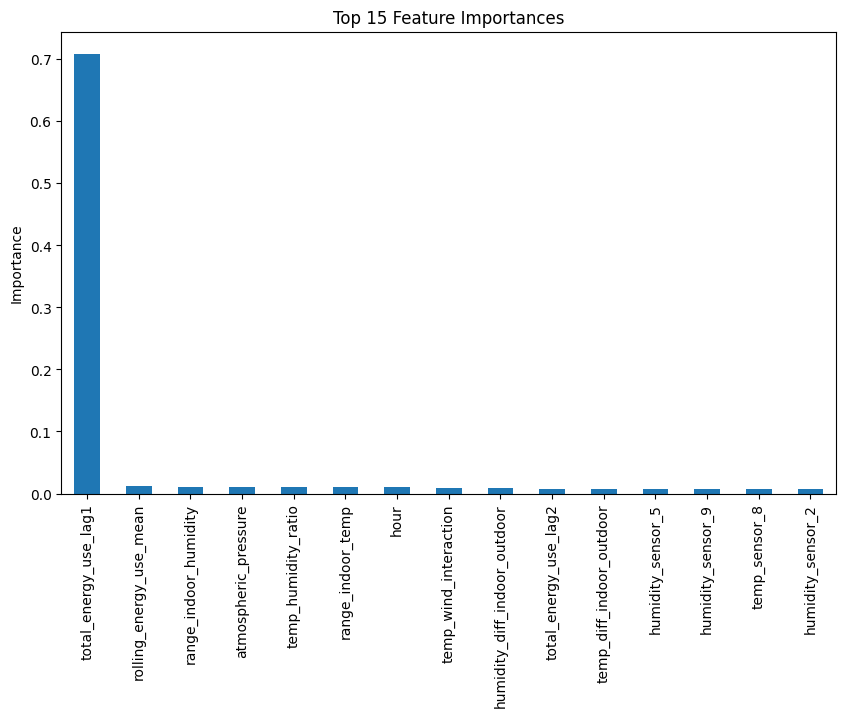

In [29]:
# Plot top 15 features
plt.figure(figsize=(10,6))
importances.head(15).plot(kind='bar')
plt.title('Top 15 Feature Importances')
plt.ylabel('Importance')
plt.show()

In [30]:
# Select top 15 features for modeling
top_features = importances.head(15).index.tolist()
X_selected = X[top_features]
print(X_selected.head())

   total_energy_use_lag1  rolling_energy_use_mean  range_indoor_humidity  \
0              -0.000113                -0.000249               1.139432   
1              -0.439645                -0.439645               0.981261   
2              -0.439645                -0.439645               1.041325   
3              -0.672419                -0.517237               1.061817   
4              -0.672419                -0.594828               1.061817   

   atmospheric_pressure  temp_humidity_ratio  range_indoor_temp  hour  \
0             -2.684267            -0.889619           1.821570    17   
1             -2.684267            -0.903095           1.789003    17   
2             -2.684267            -0.931632           1.742961    17   
3             -2.684267            -0.956859           1.772823    17   
4             -2.684267            -0.949350           1.761593    17   

   temp_wind_interaction  humidity_diff_indoor_outdoor  total_energy_use_lag2  \
0              -1.35106

Modeling

In [31]:
#Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X_selected, y, test_size=0.2, random_state=42
)

print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)

Train shape: (15788, 15)
Test shape: (3947, 15)


HyperParameter Tuning

In [32]:
param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.05, 0.1, 0.2],
    'max_depth': [3, 5, 7]
}

Gradient Boosting

In [33]:
gbr = GradientBoostingRegressor(random_state=42)
grid_search = GridSearchCV(
    estimator=gbr,
    param_grid=param_grid,
    cv=3,            
    scoring='r2',
    n_jobs=-1 
)

grid_search.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=GradientBoostingRegressor(random_state=42),
             n_jobs=-1,
             param_grid={'learning_rate': [0.05, 0.1, 0.2],
                         'max_depth': [3, 5, 7], 'n_estimators': [100, 200]},
             scoring='r2')

In [34]:
print("Best parameters:", grid_search.best_params_)
print("Best cross-validated R^2:", grid_search.best_score_)


Best parameters: {'learning_rate': 0.05, 'max_depth': 5, 'n_estimators': 100}
Best cross-validated R^2: 0.7295487592941807


In [35]:
best_gbr = grid_search.best_estimator_
y_pred_gbr = best_gbr.predict(X_test)

In [36]:
# Evaluate the model
rmse_gbr = np.sqrt(mean_squared_error(y_test, y_pred_gbr))
r2_gbr = r2_score(y_test, y_pred_gbr)

In [37]:
print("Gradient Boosting Regression Results:")
print(f"RMSE: {rmse_gbr:.4f}")
print(f"R^2: {r2_gbr:.4f}")

Gradient Boosting Regression Results:
RMSE: 0.5165
R^2: 0.7321


XG Boost


In [38]:
xgr = XGBRegressor(random_state=42)
grid_search = GridSearchCV(
    estimator=xgr,
    param_grid=param_grid,
    cv=3,            
    scoring='r2',
    n_jobs=-1 
)

grid_search.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, feature_weights=None,
                                    gamma=None, grow_policy=None,
                                    importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, max_bin=None,
                                    max_cat_threshold=None,
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.05, 0.1, 0.2],
                         'max_depth': [3, 5, 7], 'n_estimators': [100, 200]},
             scoring='r2')

In [39]:
print("Best parameters:", grid_search.best_params_)
print("Best cross-validated R^2:", grid_search.best_score_)


Best parameters: {'learning_rate': 0.05, 'max_depth': 5, 'n_estimators': 100}
Best cross-validated R^2: 0.72992425249334


In [40]:
best_xgr = grid_search.best_estimator_
y_pred_xgr = best_xgr.predict(X_test)

In [41]:
rmse_xgr = np.sqrt(mean_squared_error(y_test, y_pred_xgr))
r2_xgr = r2_score(y_test, y_pred_xgr)

In [42]:
print("XG Boost Regression Results:")
print(f"RMSE: {rmse_xgr:.4f}")
print(f"R^2: {r2_xgr:.4f}")

XG Boost Regression Results:
RMSE: 0.5167
R^2: 0.7319


Decision Tree

In [43]:
dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [44]:
y_pred_dt = dt.predict(X_test)

In [45]:
rmse_dt = np.sqrt(mean_squared_error(y_test, y_pred_dt))
r2_dt = r2_score(y_test, y_pred_dt)

In [46]:
print("\nDecision Tree Regression Results:")
print(f"RMSE: {rmse_dt:.4f}")
print(f"R^2: {r2_dt:.4f}")


Decision Tree Regression Results:
RMSE: 0.7284
R^2: 0.4672
